# 11장 분류분석 (2) 결정 트리 분석을 이용한 사용자 움직임 분류 프로젝트

### 1) 데이터 수집

#### - https://archive.ics.uci.edu/에 접속하여, ‘human activity recognition’를 검색한다. 
 -‘UCI HAR Dataset’  압축파일을 다운받아서, 압축을 푼다. 

### ★ "Duplicate names are not allowed" 에러가 발생하지 않도록 pandas 버전을 down grade하여 설치 하기
#### 방법1) Anaconda Prompt를 관리자 권한으로 실행하여, pip install pandas==0.24.2  
##### >> [Anaconda Prompt] 메뉴에서 마우스 오른쪽 버튼을 클릭하고 [자세히]-[관리자 권한으로 실행]한 후에 명령어 입력
#### 방법2) 주피터 노트북을 관리자 권한으로 실행한 후에, !pip install pandas==0.24.2  
##### >> [Jupyter Notebook] 메뉴에서 마우스 오른쪽 버튼을 클릭하고 [자세히]-[관리자 권한으로 실행] 한 후에 명령어 입력

In [1]:
# !pip install pandas==0.24.2  
!pip install pandas==1.5.1 

  Using cached pandas-1.5.1-cp310-cp310-win_amd64.whl (10.4 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.1 which is incompatible.


### 2) 데이터 준비 및 탐색

In [2]:
import numpy as np
import pandas as pd

pd.__version__ 

'1.5.1'

In [3]:
# 피처 이름 파일 읽어오기 
feature_name_df = pd.read_csv('./11장_data/UCI_HAR_Dataset/UCI_HAR_Dataset/features.txt', sep='\s+',  header=None, names=['index', 'feature_name'], engine='python')

In [4]:
feature_name_df.head()

,index,feature_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [5]:
feature_name_df.shape

(561, 2)

In [6]:
# index 제거하고, feature_name만 리스트로 저장
feature_name = feature_name_df.iloc[:, 1].values.tolist()

In [7]:
feature_name = set(feature_name)

In [8]:
feature_name= list(feature_name)

In [9]:
feature_name[:5]

['fBodyGyro-bandsEnergy()-33,48',
 'fBodyBodyAccJerkMag-max()',
 'fBodyGyro-energy()-X',
 'tBodyGyroJerk-arCoeff()-Y,4',
 'tGravityAccMag-arCoeff()2']

In [10]:
X_train = pd.read_csv('./11장_data/UCI_HAR_Dataset/UCI_HAR_Dataset/train/X_train.txt', sep='\s+', names=feature_name, engine='python')
X_test = pd.read_csv('./11장_data/UCI_HAR_Dataset/UCI_HAR_Dataset/test/X_test.txt', sep='\s+', names=feature_name, engine='python')

Y_train = pd.read_csv('./11장_data/UCI_HAR_Dataset/UCI_HAR_Dataset/train/y_train.txt', sep='\s+', header=None, names=['action'], engine='python')
Y_test = pd.read_csv('./11장_data/UCI_HAR_Dataset/UCI_HAR_Dataset/test/y_test.txt', sep='\s+', header=None, names=['action'], engine='python')

In [11]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((7352, 477), (7352, 1), (2947, 477), (2947, 1))

In [12]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 7352 entries, (0.28858451, -0.020294171, -0.13290514, -0.9952786, -0.98311061, -0.91352645, -0.99511208, -0.98318457, -0.92352702, -0.93472378, -0.56737807, -0.74441253, 0.85294738, 0.68584458, 0.81426278, -0.96552279, -0.99994465, -0.99986303, -0.99461218, -0.99423081, -0.98761392, -0.94321999, -0.40774707, -0.67933751, -0.60212187, 0.92929351, -0.85301114, 0.35990976, -0.058526382, 0.25689154, -0.22484763, 0.26410572, -0.09524563, 0.27885143, -0.46508457, 0.49193596, -0.19088356, 0.37631389, 0.43512919, 0.66079033, 0.96339614, -0.14083968, 0.11537494, -0.98524969, -0.98170843, -0.87762497, -0.98500137, -0.98441622, -0.89467735, 0.89205451, -0.16126549, 0.12465977, 0.97743631, -0.12321341, 0.056482734, -0.37542596, 0.89946864, -0.97090521, -0.97551037, -0.98432539, -0.98884915, -0.91774264, -1.0, -1.0, 0.11380614, -0.590425, 0.5911463, -0.59177346, 0.59246928, -0.74544878, 0.72086167, -0.71237239, 0.71130003, -0.99511159, 0.99567491, -

In [13]:
X_train.head()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"fBodyGyro-bandsEnergy()-33,48",fBodyBodyAccJerkMag-max(),fBodyGyro-energy()-X,"tBodyGyroJerk-arCoeff()-Y,4",tGravityAccMag-arCoeff()2,tBodyGyroJerk-entropy()-Z,fBodyGyro-iqr()-Z,"tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-arCoeff()-Y,3","tBodyGyro-correlation()-X,Y",...,fBodyAcc-entropy()-Z,tBodyGyroJerk-mad()-Z,"fBodyAcc-bandsEnergy()-1,16",fBodyBodyGyroJerkMag-std(),tBodyAcc-mad()-Y,"fBodyAccJerk-bandsEnergy()-49,64","fBodyGyro-bandsEnergy()-1,8","tBodyAcc-correlation()-X,Z",tBodyGyroMag-iqr(),fBodyGyro-meanFreq()-Y
0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,0.963396,-0.140840,0.115375,-0.985250,-0.981708,-0.877625,-0.985001,-0.984416,-0.894677,0.892055,-0.161265,0.124660,0.977436,-0.123213,0.056483,-0.375426,0.899469,-0.970905,-0.975510,-0.984325,-0.988849,-0.917743,-1.0,-1.0,0.113806,-0.590425,0.591146,-0.591773,0.592469,-0.745449,0.720862,-0.712372,0.711300,-0.995112,0.995675,-0.995668,0.991653,0.570222,0.439027,0.986913,0.077996,0.005001,-0.067831,-0.993519,-0.988360,-0.993575,-0.994488,-0.986207,-0.992818,-0.985180,-0.991994,-0.993119,0.989835,0.991957,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,0.966561,-0.141551,0.109379,-0.997411,-0.989447,-0.931639,-0.997884,-0.989614,-0.933240,0.892060,-0.161343,0.122586,0.984520,-0.114893,0.102764,-0.383430,0.907829,-0.970583,-0.978500,-0.999188,-0.990029,-0.941685,-1.0,-1.0,-0.210494,-0.410056,0.413856,-0.417567,0.421325,-0.196359,0.125345,-0.105568,0.109090,-0.833882,0.834271,-0.834184,0.830464,-0.831284,-0.865711,0.974386,0.074007,0.005771,0.029377,-0.995548,-0.981064,-0.991846,-0.995632,-0.978938,-0.991277,-0.994545,-0.979068,-0.992257,0.992577,0.991808,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,0.966878,-0.142010,0.101884,-0.999574,-0.992866,-0.992917,-0.999635,-0.992605,-0.992934,0.892401,-0.163711,0.094566,0.986770,-0.114893,0.102764,-0.401602,0.908668,-0.970368,-0.981672,-0.999679,-0.992104,-0.992619,-1.0,-1.0,-0.926776,0.002234,0.027481,-0.056728,0.085533,-0.329023,0.270500,-0.254490,0.257598,-0.705039,0.714392,-0.723299,0.728755,-0.181090,0.337936,0.643417,0.073636,0.003104,-0.009046,-0.990743,-0.980956,-0.989687,-0.990933,-0.979300,-0.987238,-0.987077,-0.979068,-0.992257,0.988390,0.991808,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,-0.576159,-0.829711,0.843609,0.682401,0.837869,-0.986093,-0.999976,-0.999736,-0.999504,-0.997180,-0.983799,-0.986007,-0.627446,-0.850930,-0.911872,0.061436,0.074840,0.198204,-0.264307,0.072545,-0.155320,0.323154,-0.170813,0.294938,-0.306081,0.482148,-0.470129,-0.305693,-0.362654,0.507459,0.96

In [14]:
print(Y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [15]:
label_name_df = pd.read_csv('./11장_data/UCI_HAR_Dataset/UCI_HAR_Dataset/activity_labels.txt', sep='\s+',  header=None, names=['index', 'label'], engine='python')

In [16]:
# index 제거하고, feature_name만 리스트로 저장
label_name = label_name_df.iloc[:, 1].values.tolist()

label_name

['WALKING',
 'WALKING_UPSTAIRS',
 'WALKING_DOWNSTAIRS',
 'SITTING',
 'STANDING',
 'LAYING']

### 3) 모델 구축 : 결정트리모델

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
# 결정 트리 분류 분석 : 1) 모델 생성
dt_HAR = DecisionTreeClassifier(random_state=156)

In [19]:
# 결정 트리 분류 분석 : 2) 모델 훈련
dt_HAR.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=156)

In [20]:
# 결정 트리 분류 분석 : 3) 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = dt_HAR.predict(X_test)

### 4) 결과 분석

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy = accuracy_score(Y_test, Y_predict)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))

결정 트리 예측 정확도 : 0.8626


#### ** 성능 개선을 위해 최적 파라미터 값 찾기

In [23]:
print('결정 트리의 현재 하이퍼 파라미터 : \n', dt_HAR.get_params())

결정 트리의 현재 하이퍼 파라미터 : 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [24]:
from sklearn.model_selection import GridSearchCV

#### 최적 파라미터 찾기 - 1

In [25]:
params = {
    'max_depth' : [ 6, 8, 10, 12, 16, 20, 24]
}

grid_cv = GridSearchCV(dt_HAR, param_grid=params, scoring='accuracy', 
                       cv=5, return_train_score=True)
grid_cv.fit(X_train , Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=156),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [26]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['param_max_depth', 'mean_test_score', 'mean_train_score']]

,param_max_depth,mean_test_score,mean_train_score
0,6,0.851069,0.939949
1,8,0.863718,0.980040
2,10,0.849299,0.993369
3,12,0.851751,0.997144
4,16,0.843996,0.999320
5,20,0.848484,1.000000
6,24,0.848484,1.000000


In [27]:
print('최고 평균 정확도 : {0:.4f}, 최적 하이퍼 파라미터 :{1}'.format(grid_cv.best_score_ , grid_cv.best_params_))

최고 평균 정확도 : 0.8637, 최적 하이퍼 파라미터 :{'max_depth': 8}


#### 최적 파라미터 찾기 - 2

In [28]:
params = {
    'max_depth' : [ 8, 16, 20 ],
    'min_samples_split' : [ 8, 16, 24 ]
}

grid_cv = GridSearchCV(dt_HAR, param_grid=params, scoring='accuracy', 
                       cv=5, return_train_score=True)
grid_cv.fit(X_train , Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=156),
             param_grid={'max_depth': [8, 16, 20],
                         'min_samples_split': [8, 16, 24]},
             return_train_score=True, scoring='accuracy')

In [29]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['param_max_depth','param_min_samples_split', 'mean_test_score', 'mean_train_score']]

,param_max_depth,param_min_samples_split,mean_test_score,mean_train_score
0,8,8,0.860452,0.978884
1,8,16,0.854876,0.977149
2,8,24,0.852969,0.973545
3,16,8,0.845765,0.994457
4,16,16,0.845631,0.989629
5,16,24,0.842499,0.983508
6,20,8,0.846852,0.994627
7,20,16,0.840326,0.989595
8,20,24,0.840049,0.983406


In [30]:
print('최고 평균 정확도 : {0:.4f}, 최적 하이퍼 파라미터 :{1}'.format(grid_cv.best_score_ , grid_cv.best_params_))

최고 평균 정확도 : 0.8605, 최적 하이퍼 파라미터 :{'max_depth': 8, 'min_samples_split': 8}


In [31]:
best_dt_HAR = grid_cv.best_estimator_
best_Y_predict = best_dt_HAR.predict(X_test)
best_accuracy = accuracy_score(Y_test, best_Y_predict)

print('best 결정 트리 예측 정확도 : {0:.4f}'.format(best_accuracy))

best 결정 트리 예측 정확도 : 0.8782


#### **  중요 피처 확인하기

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
feature_importance_values = best_dt_HAR.feature_importances_
feature_importance_values_s = pd.Series(feature_importance_values, index=X_train.columns)

In [34]:
feature_top10 = feature_importance_values_s.sort_values(ascending=False)[:10]

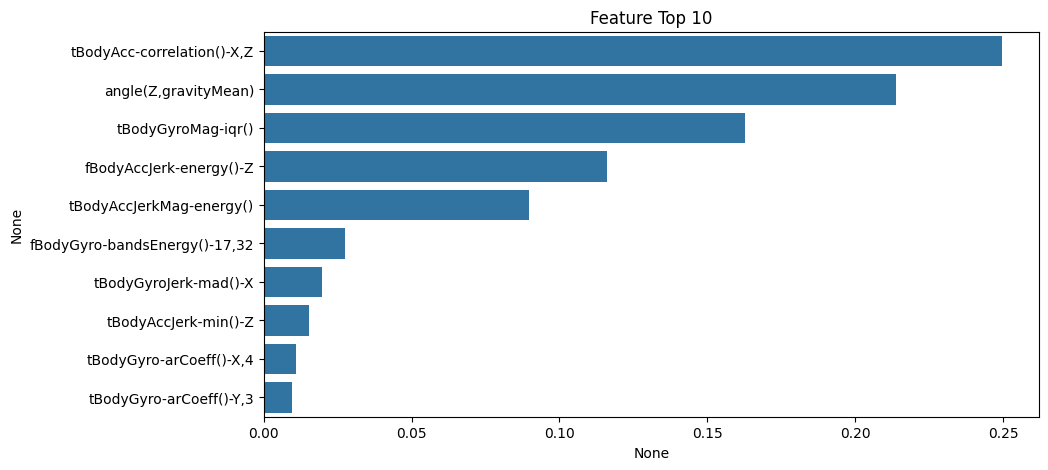

In [35]:
plt.figure(figsize = (10, 5))
plt.title('Feature Top 10')
sns.barplot(x=feature_top10, y=feature_top10.index)
plt.show()

## 5) Graphviz를 사용한 결정트리 시각화

### (1) https://www2.graphviz.org/Packages/stable/windows/10/cmake/Release/x64/에서 "graphviz-install-2.44.1-win64.exe"를 다운로드 받아서 설치
### (2) 설치한 경로를 시스템 변수 path에 직접 추가하기
#### Program Files 폴더에 있는 graphviz 폴더 잘라내기 
#### ->  잘라낸 graphviz 폴더를 C:\Users\anaconda3\Lib\site-packages에 붙여넣기
#### ->  [제어판]-[시스템]-[고급 시스템 설정]-[환경변수]-[시스템변수]에서 Path를 선택하고 [편집]에서 C:\Users\anaconda3\Lib\site-packages\graphviz 추가하기

### (3) 파이썬 래퍼 모듈 graphviz를 pip 명령으로 Anaconda에 설치

In [36]:
!pip install graphviz

In [37]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성. 
export_graphviz(best_dt_HAR, out_file="tree.dot", class_names=label_name , feature_names = feature_name, impurity=True, filled=True)

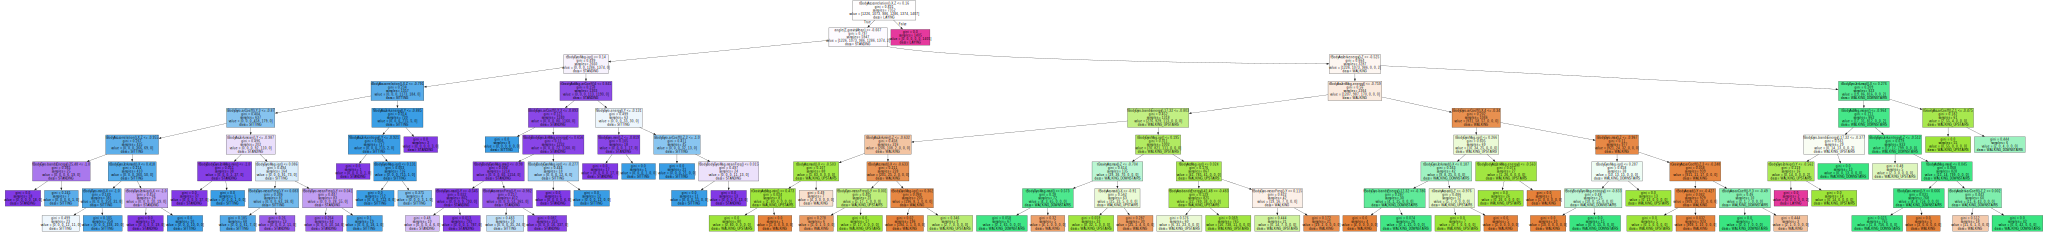

In [38]:
import graphviz
import os
os.environ["PATH"]+=os.pathsep+'C:/Python/Python310/Graphviz/bin/'

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)